<a href="https://colab.research.google.com/github/x23425237/DeepLearning_GenAI/blob/main/textClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN-Based Text Classification Model:**

Input: Raw text data (e.g., product descriptions).

Step 1: Text is processed and tokenized.

Step 2: The tokenized words are converted into dense vectors (via the embedding layer).

Step 3: Convolutional filters detect patterns in the sequence of words.

Step 4: Max pooling reduces dimensionality, keeping the most important features.

Step 5: The output of pooling is passed through dense layers to make final predictions.

Step 6: The output layer assigns a probability to each class using softmax.

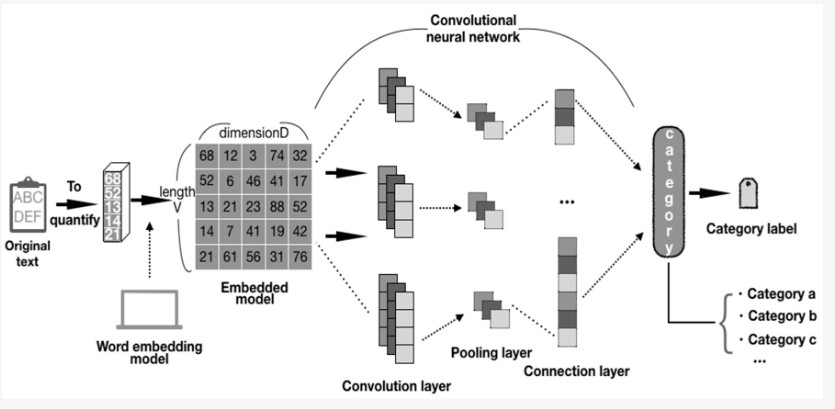

In [56]:
#!pip install spacy
!pip install contractions


In [57]:
!pip install opendatasets

In [58]:
!pip install nltk
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [59]:
# https://www.datacamp.com/tutorial/text-classification-python
#https://www.kaggle.com/code/sugataghosh/e-commerce-text-classification-tf-idf-word2vec
import opendatasets as op
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import spacy
import re
import string
import spacy
import nltk
from textblob import TextBlob
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [60]:
# Downloads
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:

op.download("https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification")
#bharathidohno
#66f0d6ee443677c5bc1d92ec501a207b

Skipping, found downloaded files in "./ecommerce-text-classification" (use force=True to force download)


In [62]:
filepath="/content/ecommerce-text-classification/ecommerceDataset.csv"

In [63]:

df=pd.read_csv(filepath,names=["label","text"])

In [64]:
df.head()

,label,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [65]:
df.iloc[10]

,10
label,Household
text,Painting Mantra Art Street - Jardin Bird Frame...


In [66]:
print(df.columns.tolist())

['label', 'text']


In [67]:
df['text'].iloc[0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [68]:
# find unique values in label column.
#['Household' 'Books' 'Clothing & Accessories' 'Electronics']
print(df["label"].unique())

['Household' 'Books' 'Clothing & Accessories' 'Electronics']


In [69]:
# Use apply() with a lambda function to create a new column
df['new_label'] = df['label'].apply(
    lambda x: 0 if x == 'Books' else (1 if x == 'Clothing & Accessories' else (2 if x == 'Electronics' else 3))
)

print(df)

             label                                               text  \
0        Household  Paper Plane Design Framed Wall Hanging Motivat...   
1        Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...   
2        Household  SAF 'UV Textured Modern Art Print Framed' Pain...   
3        Household  SAF Flower Print Framed Painting (Synthetic, 1...   
4        Household  Incredible Gifts India Wooden Happy Birthday U...   
...            ...                                                ...   
50420  Electronics  Strontium MicroSD Class 10 8GB Memory Card (Bl...   
50421  Electronics  CrossBeats Wave Waterproof Bluetooth Wireless ...   
50422  Electronics  Karbonn Titanium Wind W4 (White) Karbonn Titan...   
50423  Electronics  Samsung Guru FM Plus (SM-B110E/D, Black) Colou...   
50424  Electronics                   Micromax Canvas Win W121 (White)   

       new_label  
0              3  
1              3  
2              3  
3              3  
4              3  
...      

In [70]:
print(df["new_label"].unique())

[3 0 1 2]


In [71]:
df.head()

,label,text,new_label
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,3
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",3
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,3
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...",3
4,Household,Incredible Gifts India Wooden Happy Birthday U...,3


In [72]:
df_filtered = df[df['new_label'] == 0]
print(df_filtered)


       label                                               text  new_label
19313  Books  Inner Engineering: A Yogi's Guide to Joy About...          0
19314  Books       Muslims and Missionaries in Pre-Mutiny India          0
19315  Books  The PCOD - Thyroid Book - Compiled From Women ...          0
19316  Books  The Monk Who Sold His Ferrari Review Everyone ...          0
19317  Books  The Secret of Secrets: The Secrets of the Gold...          0
...      ...                                                ...        ...
31128  Books  Under the Banyan: Principles for Sustainable H...          0
31129  Books  The Architecture of Happiness Review Clever, p...          0
31130  Books  Zaha Hadid (Basic Art Series 2.0) About the Au...          0
31131  Books  101 Things I Learned® in Urban Design School R...          0
31132  Books  The Architecture of Happiness Review Clever, p...          0

[11820 rows x 3 columns]


In [73]:
df_filtered["text"].iloc[9]

'The Religions Book (Big Ideas) Review Fascinating material, well presented (Jon Sutton The Psychologist (Review of The Psychology Book))'

In [74]:
df_filtered2 = df[df['new_label'] == 2]
print(df_filtered2)

             label                                               text  \
39804  Electronics  Dell 19.5V-3.34AMP 65W Laptop Adapter (Without...   
39805  Electronics  Bluetooth Dongle USB CSR 4.0 Adapter Receiver ...   
39806  Electronics  Wi-Fi Receiver 300Mbps, 2.4GHz, 802.11b/g/n US...   
39807  Electronics  SanDisk 64GB Class 10 microSDXC Memory Card wi...   
39808  Electronics  Gizga Essentials Laptop Power Cable Cord- 3 Pi...   
...            ...                                                ...   
50420  Electronics  Strontium MicroSD Class 10 8GB Memory Card (Bl...   
50421  Electronics  CrossBeats Wave Waterproof Bluetooth Wireless ...   
50422  Electronics  Karbonn Titanium Wind W4 (White) Karbonn Titan...   
50423  Electronics  Samsung Guru FM Plus (SM-B110E/D, Black) Colou...   
50424  Electronics                   Micromax Canvas Win W121 (White)   

       new_label  
39804          2  
39805          2  
39806          2  
39807          2  
39808          2  
...      

In [75]:
df_filtered2["text"].iloc[9]

'Artis AR-MAC-60W-MG1 100-240V Laptop Adapter for Apple Macbook/MacBook Pro (White) AC input 100-240V for worldwide compatibility. Over voltage/ Over current protection, 1 year Warranty ( no warranty on burnt product). High temperature protection, Low ripple operating noise, high gloss Casing. Please check your laptop model no. before purchasing: This is only compatible with 13" MacBook Pro without retina display. Works With: MacBook Pro (13-inch, Mid 2012), MacBook Pro (13-inch, Late 2011), MacBook Pro (13-inch, Early 2011), MacBook Pro (13-inch, Mid 2010), Unibody MacBook (13-inch, Mid 2010), Unibody MacBook (13-inch, Late 2009)'

In [76]:
# find duplicates
isduplicate=df.duplicated()
print(isduplicate)

# count duplicates
print(isduplicate.sum())# 22622 duplicates identified



0        False
1        False
2        False
3        False
4        False
         ...  
50420     True
50421     True
50422     True
50423     True
50424     True
Length: 50425, dtype: bool
22622


In [77]:
# drop duplicates
df=df.drop_duplicates()

In [78]:
# locate missing values
# print missing values

print(df.isnull().sum())





label        0
text         1
new_label    0
dtype: int64


In [79]:
# replace missing value with non
df.fillna("non",inplace=True)

<ipython-input-79-2f2bbcebc285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna("non",inplace=True)


In [80]:
print(df['new_label'].value_counts())


new_label
3    10564
0     6256
1     5675
2     5308
Name: count, dtype: int64


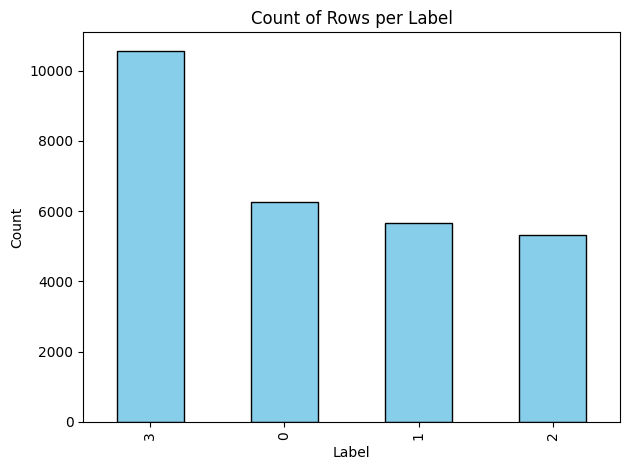

In [81]:


# Count of each label
label_counts = df['new_label'].value_counts()

# Plot
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Count of Rows per Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Text Cleaning Functions:**
* remove_special_char(text)
Removes all punctuation and special characters, keeping only letters, numbers, and spaces.

* strip_whitespace(text)
Strips leading/trailing spaces and replaces multiple spaces with a single space.

* remove_numbers(text)
Removes all digits from the text.

Remove all special characters
Lowercase all the words
Tokenize
Remove stopwords
Lemmatize

**Stopword Removal:**

* remove_stopwords(text) (using NLTK)
Tokenizes the text and removes common English stopwords (like "the", "is", "in") using the NLTK library.

* remove_stopwords_spacy(text) (using spaCy)
Uses spaCy’s pre-trained language model to identify and remove stopwords more contextually.

In [82]:
# Function to remove punctuation and special characters
def remove_special_char(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

#Stripping Extra Whitespace
def strip_whitespace(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text

#Removing Numbers
def remove_numbers(text):
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

#stop words - nltk
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered)


# Load the small English model
nlp = spacy.load("en_core_web_sm")

def remove_stopwords_spacy(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop]
    return ' '.join(tokens)



**remove_duplicates**(text)
Removes duplicate words from a string while preserving their original order.

**normalize_text**(text)
A full text normalization pipeline that performs:

* Unicode normalization
Removes non-ASCII characters for clean encoding.

* Contraction expansion
Converts "don't" to "do not", "it's" to "it is", using the contractions library.

* Lowercasing
Standardizes text to lowercase for uniformity.

* Punctuation removal
Strips all punctuation using regex.

* Whitespace cleanup
Removes extra or irregular spaces.

* NLP parsing with spaCy:

* Filters out stopwords and non-alphabetic tokens.

* Lemmatizes tokens

* Deduplication
Final step removes repeated words using remove_duplicates().





In [83]:
# remove duplicates
def remove_duplicates(text):
    seen = set()
    result = []
    for word in text.split():
        if word not in seen:
            seen.add(word)
            result.append(word)
    return ' '.join(result)



def normalize_text(text):
    # Unicode normalization
    text = text.encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Expand contractions
    text = contractions.fix(text)

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Spelling correction (basic)
    #text = str(TextBlob(text).correct())

    # Tokenization and NLP parsing
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.text not in stop_words \
           and token.is_alpha \
           and token.pos_ in {'NOUN', 'ADJ', 'VERB'}:
            # Lemmatization
            tokens.append(token.lemma_)

    return remove_duplicates(' '.join(tokens))

In [84]:
# apply normalise text functions to sample text

sample1=df_filtered2["text"].iloc[9]

print(sample1)

Artis AR-MAC-60W-MG1 100-240V Laptop Adapter for Apple Macbook/MacBook Pro (White) AC input 100-240V for worldwide compatibility. Over voltage/ Over current protection, 1 year Warranty ( no warranty on burnt product). High temperature protection, Low ripple operating noise, high gloss Casing. Please check your laptop model no. before purchasing: This is only compatible with 13" MacBook Pro without retina display. Works With: MacBook Pro (13-inch, Mid 2012), MacBook Pro (13-inch, Late 2011), MacBook Pro (13-inch, Early 2011), MacBook Pro (13-inch, Mid 2010), Unibody MacBook (13-inch, Mid 2010), Unibody MacBook (13-inch, Late 2009)


In [85]:
normalised=normalize_text(sample1)
print(sample1)
print(normalised)

Artis AR-MAC-60W-MG1 100-240V Laptop Adapter for Apple Macbook/MacBook Pro (White) AC input 100-240V for worldwide compatibility. Over voltage/ Over current protection, 1 year Warranty ( no warranty on burnt product). High temperature protection, Low ripple operating noise, high gloss Casing. Please check your laptop model no. before purchasing: This is only compatible with 13" MacBook Pro without retina display. Works With: MacBook Pro (13-inch, Mid 2012), MacBook Pro (13-inch, Late 2011), MacBook Pro (13-inch, Early 2011), MacBook Pro (13-inch, Mid 2010), Unibody MacBook (13-inch, Mid 2010), Unibody MacBook (13-inch, Late 2009)
laptop adapter white input worldwide compatibility voltage current protection year warranty burn product high temperature low ripple operating noise gloss casing check model purchase compatible macbook pro display work inch mid late unibody


In [86]:
df["normalised_text"]=df["text"].apply(normalize_text)

In [ ]:
df.head()



In [ ]:
# count number of words in each row in normalised_text column . create new column
df['word_count'] = df['normalised_text'].apply(lambda x: len(x.split()))

df.head()

In [ ]:
# max word_count by lable
average_word_count = df.groupby('label')['word_count'].max()

average_word_count

In [ ]:
# select word_count where label=books
df_books = df[df['label'] == 'Books']['word_count']
df_clothing = df[df['label'] == 'Clothing & Accessories']['word_count']
df_Electronics = df[df['label'] == 'Electronics']['word_count']
df_Household = df[df['label'] == 'Household']['word_count']

In [ ]:
# scatter plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].scatter(df_books, df_books, color='skyblue', edgecolor='black')
axs[0,1].scatter(df_clothing, df_clothing, color='yellow', edgecolor='black')
axs[1,0].scatter(df_Electronics, df_Electronics, color='green', edgecolor='black')
axs[1,1].scatter(df_Household, df_Household, color='pink', edgecolor='black')

axs[0,0].set_title('Books')
axs[0,1].set_title('Clothing & Accessories')
axs[1,0].set_title('Electronics')
axs[1,1].set_title('Household')

plt.tight_layout()

In [ ]:
# violin plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].violinplot(df_books, showmeans=True)
axs[0,1].violinplot(df_clothing, showmeans=True)
axs[1,0].violinplot(df_Electronics, showmeans=True)
axs[1,1].violinplot(df_Household, showmeans=True)

axs[0,0].set_title('Books')
axs[0,1].set_title('Clothing & Accessories')
axs[1,0].set_title('Electronics')
axs[1,1].set_title('Household')

plt.tight_layout()

In [ ]:
# select only normalised_text and new_lable fields
df_new=df[["normalised_text","new_label"]]

In [ ]:
df_new.head()

In [ ]:
df_new

**Tokenization** and Padding:
* Tokenizer: Converts words into integers based on frequency (max_words=1000).

* Sequences: Converts text to sequences of tokens.

* Padding: Ensures all sequences have the same length (max_len=100) for model input.

In [ ]:
# APPLimport pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout



text=df_new["normalised_text"]
labels=df_new["new_label"]

max_words=1000
max_len=100
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text)


sequences=tokenizer.texts_to_sequences(text)
X=pad_sequences(sequences,maxlen=max_len)

y = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Convolutional** Neural Network (CNN) for Text Classification
Purpose: The model is designed to classify text into different categories (multi-class classification), such as categorizing e-commerce product reviews.



In [ ]:
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')  # y.shape[1] gives number of classes
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
output=model.fit(X_train, y_train,
          epochs=5,
          batch_size=64,
          validation_split=0.2)

In [ ]:
# Extract training and validation accuracy and convert to percentage
train_acc = output.history['accuracy'] * 100
val_acc = output.history['val_accuracy'] * 100

print(f"Training Accuracy: {train_acc}")
print(f"Validation Accuracy: {val_acc}")

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:

# Generate the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(cm.shape[0]), yticklabels=np.arange(cm.shape[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
# Impliment BERT

from transformers import pipeline
from tqdm import tqdm


classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ['Household', 'Books' ,'Clothing & Accessories', 'Electronics']

tqdm.pandas()

In [ ]:
df.iloc[19000]

In [ ]:
df_new.iloc[19000]

In [ ]:
sample2=df_new["normalised_text"].iloc[19000]
print(sample2)

In [ ]:

text_classify=sample2

classifier(text_classify,candidate_labels)   # 97% for work



In [ ]:

# Ref:
# https://www.geeksforgeeks.org/text-classification-using-cnn/
# https://cnvrg.io/cnn-sentence-classification/
# https://www.mdpi.com/1999-5903/12/12/228

